# Accessing ZDF data files with Python

Access to ZDF data with Python requires importing the __zdf__ module

In [1]:
import zdf

You can list the contents of ZDF files using the __list__ command:

In [2]:
zdf.list("test/E1-000072.zdf", printRec = True)

Position     Size(bytes)  Type        Name
-------------------------------------------------
0x00000004   0x00000008   string      TYPE
0x00000020   0x00000060   grid_info   GRID
0x00000094   0x0000001c   iteration   ITERATION
0x000000cc   0x000001f0   dataset     DATA


## Grid data

For grid files, data (and metadata) can be read using the __read_grid__ command

In [3]:
(data,info) = zdf.read_grid("test/E1-000072.zdf")

_data_ is a NumPy ndarray, _info_ is a dictionary with all the metadata.

In [4]:
print("data is of type: ",type(data))

print("\nAvailable metadata:")
for i in info.items():
    print("->",i)

data is of type:  <class 'numpy.ndarray'>

Available metadata:
-> ('grid', {'has_axis': 1, 'ndims': 1, 'nx': [120], 'axis': [{'min': 0.0, 'max': 1.5707963705062866, 'type': 0, 'units': 'c/\\omega_p', 'label': 'x_1'}], 'units': 'm_e c \\omega_p e^{-1}', 'label': 'E1'})
-> ('iteration', {'n': 72, 'tunits': '1/\\omega_p', 't': 18.0})


If you are just interested in the metadata, you should use the __info_grid__ command instead:

In [5]:
info = zdf.info_grid("test/J3-000500.zdf")

print("\nAvailable metadata:")
for i in info.items():
    print("->",i)


Available metadata:
-> ('grid', {'has_axis': 1, 'ndims': 2, 'nx': [128, 128], 'axis': [{'min': 0.0, 'max': 12.800000190734863, 'type': 0, 'units': 'c/\\omega_p', 'label': 'x_1'}, {'min': 0.0, 'max': 12.800000190734863, 'type': 0, 'units': 'c/\\omega_p', 'label': 'x_2'}], 'units': 'e \\omega_p^2 / c', 'label': 'J3'})
-> ('iteration', {'n': 500, 'tunits': '1/\\omega_p', 't': 35.0})


## Particle data

Similarly, to read the data (and metadata) in a particle data file you should use the __read_particles__ command:

In [6]:
(particles,info) = zdf.read_particles("test/particles-beam1-000254.zdf")

_particles_ is a dictionary with one entry per particle quantity available, where each entry is a numpy ndarray. _info_ is a dictionary with all the metadata.

In [7]:
print("particles is of type: ",type(particles))
for i in particles.items():
    print("->",i)

print("\nAvailable metadata:")
for i in info.items():
    print("->",i)

particles is of type:  <class 'dict'>
-> ('x1', array([ 0.08903269,  0.08431552,  0.08148864, ...,  0.09081474,
        0.08171552,  0.0853789 ], dtype=float32))
-> ('v1', array([ 0.0129246 ,  0.01278918,  0.00873535, ...,  0.01559132,
        0.01602665,  0.01596126], dtype=float32))

Available metadata:
-> ('particles', {'nparts': 60000, 'units': {'x1': 'c/\\omega_p', 'v1': 'c'}, 'nquants': 2, 'name': 'beam1', 'quants': ['x1', 'v1']})
-> ('iteration', {'n': 254, 'tunits': '1/\\omega_p', 't': 63.5})


## Plotting with Matplotlib

You can plot the data with any of your favorite tools. Below are examples for plotting ZDF data using Matplotlib.

### 1D Grid data plot

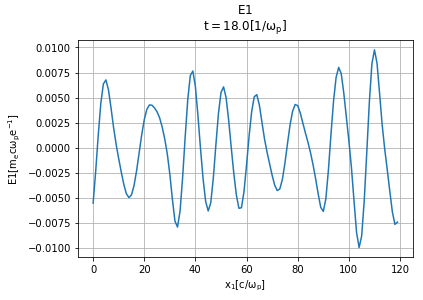

In [8]:
import matplotlib.pyplot as plt

(data,info) = zdf.read_grid("test/E1-000072.zdf")

plt.plot(data)

xlabel = info['grid']['axis'][0]['label'] + ' [' + info['grid']['axis'][0]['units'] + ']'
ylabel = info['grid']['label'] +' [' + info['grid']['units'] + ']'

title = info['grid']['label']
timeLabel = 't = ' + str( info['iteration']['t'] ) + ' ['+info['iteration']['tunits'] + ']'

plt.title(r'$\sf{' + title + r'}$' + '\n' + r'$\sf{'+ timeLabel+ r'}$')

plt.xlabel(r'$\sf{' +xlabel+ r'}$')
plt.ylabel(r'$\sf{' +ylabel+ r'}$')

plt.grid(True)
plt.show()

## 2D grid data plot

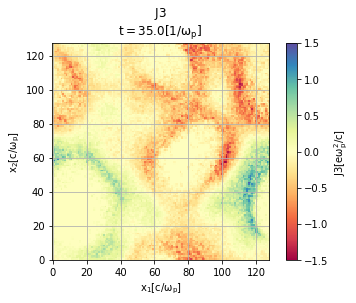

In [9]:
import matplotlib.pyplot as plt
import numpy as np

(data,info) = zdf.read_grid("test/J3-000500.zdf")


plt.imshow( data, cmap = plt.cm.Spectral, vmin = -1.5, vmax = 1.5, interpolation = 'nearest', origin = 'lower')

zlabel = info['grid']['label'] +' [' + info['grid']['units'] + ']'
plt.colorbar().set_label(r'$\sf{' +zlabel+ r'}$')

title = info['grid']['label']
timeLabel = 't = ' + str( info['iteration']['t'] ) + ' ['+info['iteration']['tunits'] + ']'

plt.title(r'$\sf{' + title + r'}$' + '\n' + r'$\sf{'+ timeLabel+ r'}$')

xlabel = info['grid']['axis'][0]['label'] + ' [' + info['grid']['axis'][0]['units'] + ']'
ylabel = info['grid']['axis'][1]['label'] + ' [' + info['grid']['axis'][1]['units'] + ']'

plt.xlabel(r'$\sf{' +xlabel+ r'}$')
plt.ylabel(r'$\sf{' +ylabel+ r'}$')

plt.grid(True)

plt.show()


### Plotting particle data

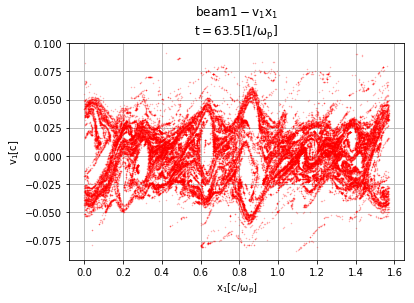

In [10]:
import matplotlib.pyplot as plt

(particles,info) = zdf.read_particles("test/particles-beam1-000254.zdf")

x = particles['x1']
y = particles['v1']

plt.plot(x, y, 'r.', ms=1,alpha=0.3)

t = str(info["iteration"]["t"])
tunits = str(info["iteration"]["tunits"])

title = info['particles']['name'] + '-  v_1 x_1'

timeLabel = r'$\sf{t = ' + t + ' [' + tunits + r']}$'
plt.title(r'$\sf{' + title + r'}$' + '\n' + timeLabel)

xlabel = 'x_1' + '[' + info['particles']['units']['x1'] + ']'
ylabel = 'v_1' + '[' + info['particles']['units']['v1'] + ']'

plt.xlabel(r'$\sf{' + xlabel + r'}$')
plt.ylabel(r'$\sf{' + ylabel + r'}$')

plt.grid(True)

plt.show()